In [1]:
from scipy.special import beta
from scipy.special import gamma
import math
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from pylab import MaxNLocator



In [15]:
D0w = 4.057
nuDw = 280.295
D0n = 7.985
nuDn = 29.251
T0 = 2.058
nuT = 199
Dw = D0w * gamma(0.5) / beta(nuDw,0.5)
sigmaDw = math.sqrt(nuDw*D0w*D0w - Dw*Dw)
Dn = D0n * gamma(0.5) / beta(nuDn,0.5)
sigmaDn = math.sqrt(nuDn*D0n*D0n - Dn*Dn)
T = T0 * gamma(0.5) / beta(nuT,0.5)
sigmaT = math.sqrt(nuT*T0*T0 - T*T)

print(Dw)
print(Dn)
print(T)


67.8920630329872
43.002081095159575
29.013432422515773


In [36]:
val = pd.read_excel("C:/Users/Lenovo/Desktop/大四下/毕设/CODE/dp_crystmorph/regionIII_double_peak/region_III_excel/1.8-R3-246.xlsx")
value = val.values
Dw_array = np.zeros((value.shape[0]))
Dn_array = np.zeros((value.shape[0]))
k = np.zeros((value.shape[0]))
for i in range(0,value.shape[0]):
    D0w = value[i,3]
    nuDw = value[i,4]
    D0n = value[i,6]
    nuDn = value[i,7]
    T0 = value[i,8]
    nuT = value[i,9]
    Dw = D0w * gamma(0.5) / beta(nuDw,0.5)
    sigmaDw = math.sqrt(nuDw*D0w*D0w - Dw*Dw)
    Dn = D0n * gamma(0.5) / beta(nuDn,0.5)
    sigmaDn = math.sqrt(nuDn*D0n*D0n - Dn*Dn)
    T = T0 * gamma(0.5) / beta(nuT,0.5)
    sigmaT = math.sqrt(nuT*T0*T0 - T*T)
    Dw_array[i] = Dw
    Dn_array[i] =Dn
    T_array[i] = T
    k[i] = value[i,2]/value[i,5]

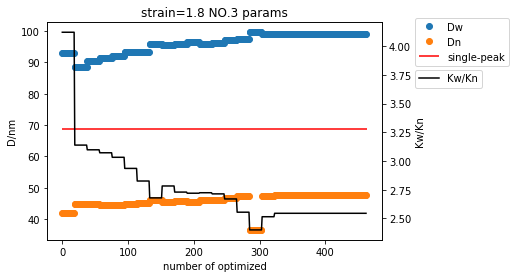

In [35]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(Dw_array,'o',label='Dw')
ax1.plot(Dn_array, 'o', label='Dn')
ax1.hlines(68.7,0,value.shape[0],'r',label="single-peak")
plt.xlabel("number of optimized")
plt.ylabel("D/nm")
#ax1.legend(loc='center right')
ax1.legend(bbox_to_anchor=(1.1, 0.8), loc=3, borderaxespad=0)
ax2 = ax1.twinx()
ax2.plot(k, 'k-',label='Kw/Kn')
#ax2.legend(loc="center")
ax2.legend(bbox_to_anchor=(1.1, 0.7), loc=3, borderaxespad=0)
plt.ylabel("Kw/Kn")
fig.savefig('1.8-NO3.png', dpi=500,bbox_inches='tight')
plt.title("strain=1.8 NO.3 params")
plt.show()

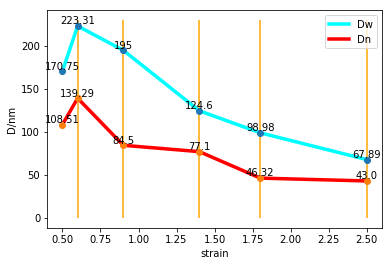

In [2]:
strain = [0.5,0.6,0.9,1.4,1.8,2.5]
Kw = [60.39,31.6,42.8,36.9,30.00,20.926]
Kn = [6.9,26.1,9.42,23.3,11.7,11.561]
Dw = [170.75,223.31,195,124.6,98.98,67.89]
Dn = [108.51,139.29,84.5,77.1,46.32,43.00]
k = []
for i in range(0,6):
    k.append(Kw[i]/Kn[i])
#plt.subplot(2,1,1)
plt.xlabel("strain")
plt.ylabel("D/nm")
plt.plot(strain,Dw,color="cyan", linewidth=3.5, linestyle="-",label="Dw")
plt.plot(strain,Dn,color="red", linewidth=3.5, linestyle="-",label="Dn")
plt.plot(strain,Dw,'o')
plt.plot(strain,Dn,'o')
plt.vlines([0.6,0.9,1.4,1.8,2.5],0,230,color="orange")
plt.legend()
for i in range(0,6):
    plt.text(strain[i],Dw[i],Dw[i],ha='center', va= 'bottom')
    plt.text(strain[i],Dn[i],Dn[i],ha='center', va= 'bottom')
#plt.subplot(2,1,2)
#plt.plot(strain,k)
plt.show()

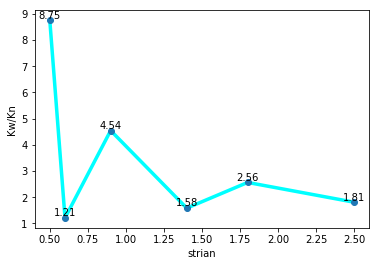

In [32]:
plt.plot(strain,k,color="cyan",linewidth=3.5)
plt.plot(strain,k,"o")
plt.xlabel("strain")
plt.ylabel("Kw/Kn")
for i in range(0,6):
    plt.text(strain[i],k[i],round(k[i],2),ha='center', va= 'bottom')

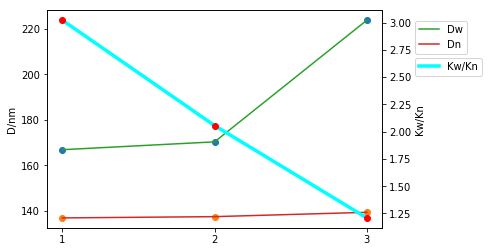

In [63]:
num = [1,2,3]
Dw_06 = [166.82,170.28,223.88]
Dn_06 = [136.75,137.31,139.22]
k = [35.2/11.65,43.09/20.96,31.62/26.15]
# plt.plot(num,DW_06,label="Dw")
# plt.plot(num,Dn_06,label="Dn")
# plt.plot(num,DW_06,"o")
# plt.plot(num,Dn_06,"o")
# plt.ylabel("D/nm")
# plt.legend()
# plt.show()

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(num,Dw_06,"o")
ax1.plot(num,Dn_06,"o")
ax1.plot(num,Dw_06,label='Dw')
ax1.plot(num,Dn_06, label='Dn')
plt.ylabel("D/nm")
#ax1.legend(loc='center right')
ax1.legend(bbox_to_anchor=(1.1, 0.8), loc=3, borderaxespad=0)
ax2 = ax1.twinx()
ax2.plot(num,k, color="cyan",linewidth=3.5,label='Kw/Kn')
ax2.plot(num,k,"o",color="red")
#ax2.legend(loc="center")
ax2.legend(bbox_to_anchor=(1.1, 0.7), loc=3, borderaxespad=0)
plt.ylabel("Kw/Kn")
ya = ax1.get_xaxis()
ya.set_major_locator(MaxNLocator(integer=True))
plt.show()

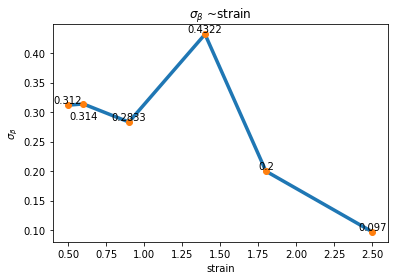

In [25]:
# plot sigma_beta

sigma_beta = [0.312,0.314,0.2833,0.4322,0.200,0.097]
plt.plot(strain,sigma_beta,linewidth=3.5)
plt.plot(strain,sigma_beta,"o")
plt.xlabel("strain")
plt.ylabel(r"$\sigma_\beta$")
plt.title(r"$\sigma_\beta$ ~strain")
for i in range(0,6):
    if i == 1:
        plt.text(strain[i],sigma_beta[i]-0.03,sigma_beta[i],ha='center', va= 'bottom')
    else :
        plt.text(strain[i],sigma_beta[i],sigma_beta[i],ha='center', va= 'bottom')

plt.show()

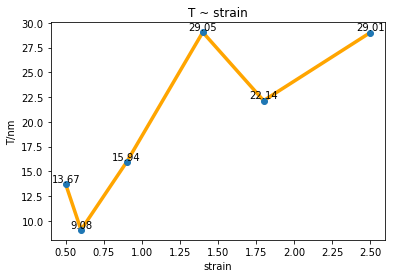

In [27]:
#T ~strain

T = [13.67,9.08,15.94,29.05,22.14,29.01]
plt.plot(strain,T,linewidth=3.5,color="orange")
plt.plot(strain,T,"o")
plt.xlabel("strain")
plt.ylabel("T/nm")
plt.title("T ~ strain")
for i in range(0,6):
    plt.text(strain[i],T[i],T[i],ha='center', va= 'bottom')

In [ ]:
# L ~ strain
